## 2. Implement Gauss-Jordan with partial pivoting.

In [1]:
import numpy as np

def gauss_jordan(A, b):
    n = len(b)
    # Augment the matrix A with the vector b
    augmented_matrix = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))

    # Perform Gauss-Jordan elimination with partial pivoting
    for i in range(n):
        # Partial pivoting: find the row with the maximum element in the current column
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k, i]) > abs(augmented_matrix[max_row, i]):
                max_row = k

        # Swap the current row with the max_row
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        # Make the diagonal element 1
        pivot = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / pivot

        # Eliminate all other entries in the current column
        for k in range(n):
            if k != i and augmented_matrix[k, i] != 0:
                augmented_matrix[k] = augmented_matrix[k] - augmented_matrix[k, i] * augmented_matrix[i]

    # Extract the solution vector
    solution = augmented_matrix[:, -1]
    return solution

# Define parameters for the heat equation
L = 1.0  # Length of the rod
N = 4  # Number of interior nodes
k = 1.0  # Thermal conductivity

# Define the heat generation function q(x)
def q(x):
    return np.sin(np.pi * x)

# Calculate grid spacing and interior nodes
h = L / (N + 1)
xi = np.linspace(h, L - h, N)

# Construct the coefficient matrix A
A = np.diag(-2 * np.ones(N)) + np.diag(np.ones(N - 1), k=1) + np.diag(np.ones(N - 1), k=-1)

# Construct the right-hand side vector b
b = -h**2 * q(xi) / k

# Solve the system using the Gauss-Jordan elimination method
T_solution = gauss_jordan(A, b)
print("Temperature solution:", T_solution)


Temperature solution: [0.06155367 0.09959593 0.09959593 0.06155367]


## 3. Constant heat source (q = const)

In [2]:
import numpy as np

def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))

    for i in range(n):
        max_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        pivot = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / pivot

        for k in range(n):
            if k != i and augmented_matrix[k, i] != 0:
                augmented_matrix[k] = augmented_matrix[k] - augmented_matrix[k, i] * augmented_matrix[i]

    solution = augmented_matrix[:, -1]
    return solution

# Parameters
L = 1.0  # Length of the rod
k = 1.0  # Thermal conductivity
q0 = 1.0  # Constant heat source

# Analytical solution
def T_analytical(x, L, q0, k):
    return (q0 * L**2 / (2 * k)) * x * (1 - x / L)

# Solve for different N values
N_values = [10, 20, 50, 100]
max_errors = []
condition_numbers = []

for N in N_values:
    h = L / (N + 1)
    xi = np.linspace(h, L - h, N)

    # Construct the coefficient matrix A
    A = np.diag(-2 * np.ones(N)) + np.diag(np.ones(N - 1), k=1) + np.diag(np.ones(N - 1), k=-1)

    # Construct the right-hand side vector b
    b = -h**2 * q0 / k * np.ones(N)

    # Solve the system using the Gauss-Jordan elimination method
    T_num = gauss_jordan(A, b)

    # Compute the analytical solution
    T_ana = T_analytical(xi, L, q0, k)

    # Compute the maximum error
    max_error = np.max(np.abs(T_num - T_ana))
    max_errors.append(max_error)

    # Compute the condition number of A
    cond_A = np.linalg.cond(A, p=2)
    condition_numbers.append(cond_A)

    print(f"N = {N}:")
    print(f"  Maximum Error: {max_error}")
    print(f"  Condition Number: {cond_A}\n")

# Print results
for i, N in enumerate(N_values):
    print(f"N = {N}:")
    print(f"  Maximum Error: {max_errors[i]}")
    print(f"  Condition Number: {condition_numbers[i]}\n")


N = 10:
  Maximum Error: 1.3877787807814457e-17
  Condition Number: 48.374150078708304

N = 20:
  Maximum Error: 6.938893903907228e-17
  Condition Number: 178.06427461085917

N = 50:
  Maximum Error: 9.853229343548264e-16
  Condition Number: 1053.478991200247

N = 100:
  Maximum Error: 1.1102230246251565e-15
  Condition Number: 4133.642926801396

N = 10:
  Maximum Error: 1.3877787807814457e-17
  Condition Number: 48.374150078708304

N = 20:
  Maximum Error: 6.938893903907228e-17
  Condition Number: 178.06427461085917

N = 50:
  Maximum Error: 9.853229343548264e-16
  Condition Number: 1053.478991200247

N = 100:
  Maximum Error: 1.1102230246251565e-15
  Condition Number: 4133.642926801396



## 4. Variable heat source (q = q(x))

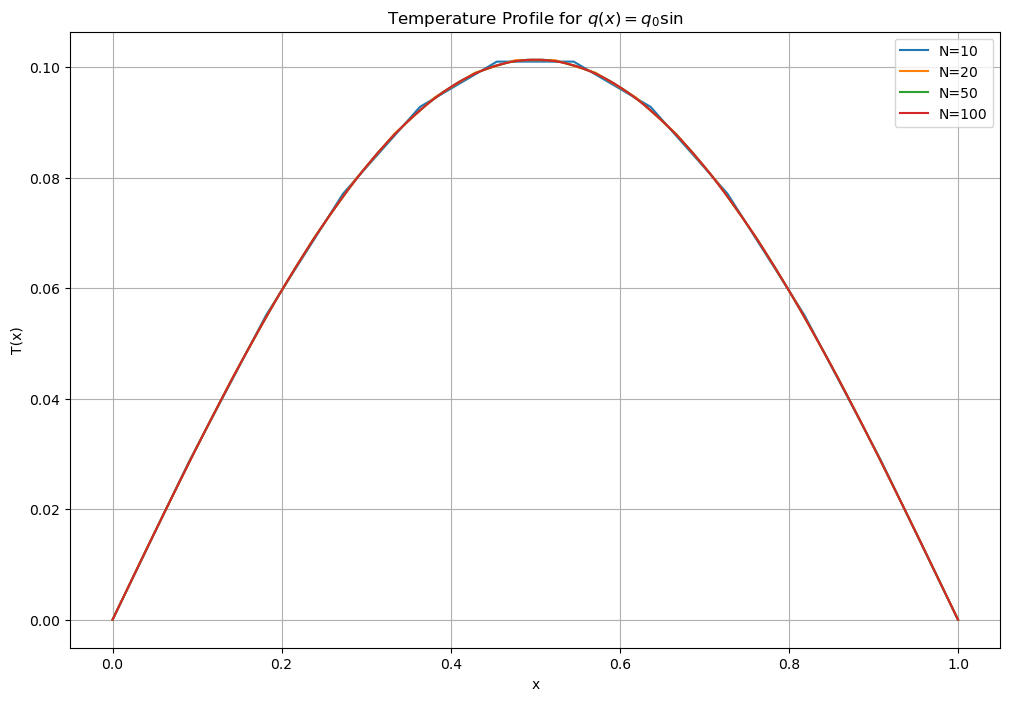

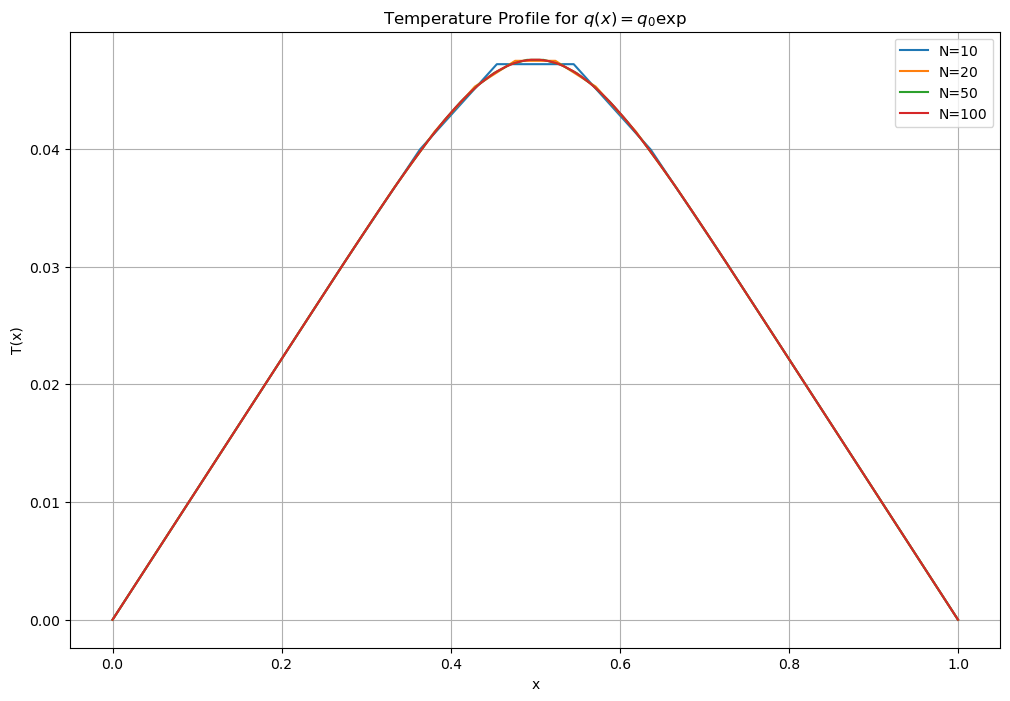

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))

    for i in range(n):
        max_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        pivot = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / pivot

        for k in range(n):
            if k != i and augmented_matrix[k, i] != 0:
                augmented_matrix[k] = augmented_matrix[k] - augmented_matrix[k, i] * augmented_matrix[i]

    solution = augmented_matrix[:, -1]
    return solution

# Parameters
L = 1.0  # Length of the rod
k = 1.0  # Thermal conductivity
q0 = 1.0  # Heat source amplitude

# Define heat source functions
def q_sin(x, L):
    return q0 * np.sin(np.pi * x / L)

def q_exp(x, L):
    sigma = L / 8
    return q0 * np.exp(-(x - L / 2)**2 / sigma**2)

# Solve for different N values and plot T(x)
N_values = [10, 20, 50, 100]

for q_func, q_label in zip([q_sin, q_exp], ["sin", "exp"]):
    plt.figure(figsize=(12, 8))

    for N in N_values:
        h = L / (N + 1)
        xi = np.linspace(h, L - h, N)

        # Construct the coefficient matrix A
        A = np.diag(-2 * np.ones(N)) + np.diag(np.ones(N - 1), k=1) + np.diag(np.ones(N - 1), k=-1)

        # Construct the right-hand side vector b
        b = -h**2 / k * q_func(xi, L)

        # Solve the system using the Gauss-Jordan elimination method
        T_num = gauss_jordan(A, b)

        # Plot the temperature profile
        plt.plot(np.linspace(0, L, N + 2), np.concatenate(([0], T_num, [0])), label=f"N={N}")

    plt.title(f"Temperature Profile for $q(x) = q_0 \\{q_label}$")
    plt.xlabel("x")
    plt.ylabel("T(x)")
    plt.legend()
    plt.grid(True)
    plt.show()


## 5. Grid-refinement study

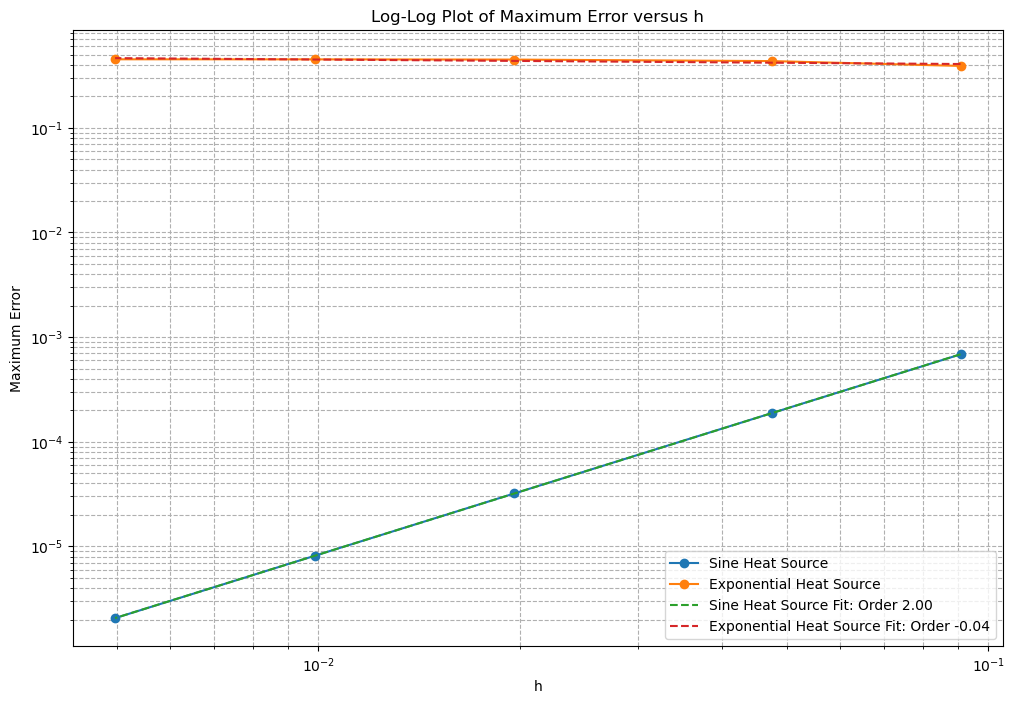

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))

    for i in range(n):
        max_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        pivot = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / pivot

        for k in range(n):
            if k != i and augmented_matrix[k, i] != 0:
                augmented_matrix[k] = augmented_matrix[k] - augmented_matrix[k, i] * augmented_matrix[i]

    solution = augmented_matrix[:, -1]
    return solution

# Parameters
L = 1.0  # Length of the rod
k = 1.0  # Thermal conductivity
q0 = 1.0  # Heat source amplitude

# Define heat source functions
def q_sin(x, L):
    return q0 * np.sin(np.pi * x / L)

def q_exp(x, L):
    sigma = L / 8
    return q0 * np.exp(-(x - L / 2)**2 / sigma**2)

# Analytical solution for the sine heat source
def T_analytical_sin(x, L, q0, k):
    return (q0 * L**2 / (k * np.pi**2)) * np.sin(np.pi * x / L)

# Analytical solution for the exponential heat source (approximate)
def T_analytical_exp(x, L, q0, k):
    sigma = L / 8
    return (q0 * L**2 / (2 * k)) * np.exp(-(x - L / 2)**2 / sigma**2)  # Simplified approximation

# Solve for different N values and compute errors
N_values = [10, 20, 50, 100, 200]
h_values = [L / (N + 1) for N in N_values]
max_errors_sin = []
max_errors_exp = []

for N in N_values:
    h = L / (N + 1)
    xi = np.linspace(h, L - h, N)

    # Construct the coefficient matrix A
    A = np.diag(-2 * np.ones(N)) + np.diag(np.ones(N - 1), k=1) + np.diag(np.ones(N - 1), k=-1)

    # Solve for the sine heat source
    b_sin = -h**2 / k * q_sin(xi, L)
    T_num_sin = gauss_jordan(A, b_sin)
    T_ana_sin = T_analytical_sin(xi, L, q0, k)
    max_error_sin = np.max(np.abs(T_num_sin - T_ana_sin))
    max_errors_sin.append(max_error_sin)

    # Solve for the exponential heat source
    b_exp = -h**2 / k * q_exp(xi, L)
    T_num_exp = gauss_jordan(A, b_exp)
    T_ana_exp = T_analytical_exp(xi, L, q0, k)
    max_error_exp = np.max(np.abs(T_num_exp - T_ana_exp))
    max_errors_exp.append(max_error_exp)

# Log-log plot of the maximum error versus h
plt.figure(figsize=(12, 8))

plt.loglog(h_values, max_errors_sin, marker='o', label='Sine Heat Source')
plt.loglog(h_values, max_errors_exp, marker='o', label='Exponential Heat Source')

# Fit a line to estimate the order of convergence
for errors, label in zip([max_errors_sin, max_errors_exp], ['Sine Heat Source', 'Exponential Heat Source']):
    coeffs = np.polyfit(np.log(h_values), np.log(errors), 1)
    plt.loglog(h_values, np.exp(coeffs[1]) * np.array(h_values)**coeffs[0], '--', label=f'{label} Fit: Order {coeffs[0]:.2f}')

plt.title('Log-Log Plot of Maximum Error versus h')
plt.xlabel('h')
plt.ylabel('Maximum Error')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## 6. Spatially Varying Thermal Conductivity k(x)
## 6.1. Modified Setup

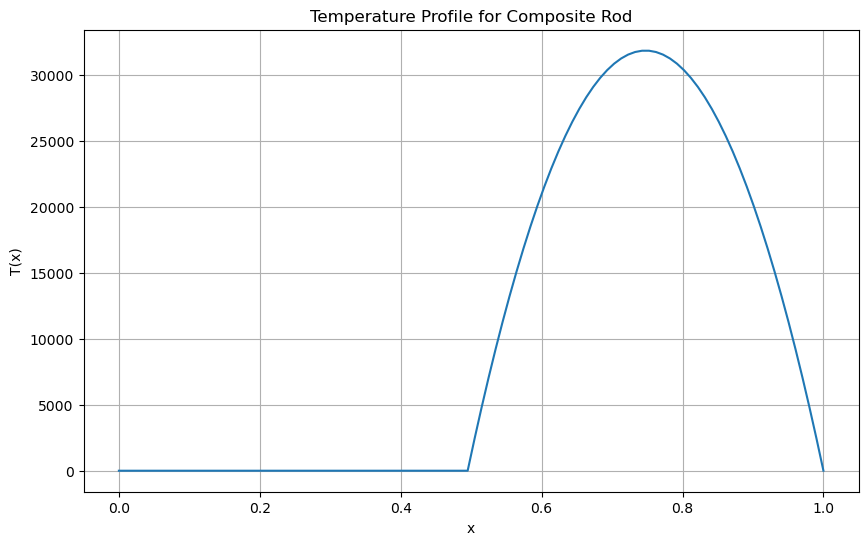

Condition Number of A: 1053461161.273493


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))

    for i in range(n):
        max_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        pivot = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / pivot

        for k in range(n):
            if k != i and augmented_matrix[k, i] != 0:
                augmented_matrix[k] = augmented_matrix[k] - augmented_matrix[k, i] * augmented_matrix[i]

    solution = augmented_matrix[:, -1]
    return solution

# Parameters
L = 1.0  # Length of the rod
q0 = 1.0  # Constant heat source
k_hi = 1.0  # Thermal conductivity for the first half
k_lo = 1e-6 * k_hi  # Thermal conductivity for the second half

# Number of interior nodes
N = 100
h = L / (N + 1)
xi = np.linspace(h, L - h, N)

# Construct the coefficient matrix A and right-hand side vector b
A = np.zeros((N, N))
b = np.zeros(N)

# Fill the coefficient matrix A and vector b
for i in range(N):
    x = xi[i]
    if x < L / 2:
        k = k_hi
    else:
        k = k_lo

    if i == 0:
        A[i, i] = - (k + k) / h**2
        A[i, i+1] = k / h**2
    elif i == N - 1:
        A[i, i-1] = k / h**2
        A[i, i] = - (k + k) / h**2
    else:
        if xi[i] < L / 2 and xi[i+1] >= L / 2:
            k_right = k_lo
        else:
            k_right = k

        A[i, i-1] = k / h**2
        A[i, i] = - (k + k_right) / h**2
        A[i, i+1] = k_right / h**2

    b[i] = -q0

# Solve the system using the Gauss-Jordan elimination method
T_num = gauss_jordan(A, b)

# Plot the temperature profile
plt.figure(figsize=(10, 6))
plt.plot(np.concatenate(([0], xi, [L])), np.concatenate(([0], T_num, [0])))
plt.title("Temperature Profile for Composite Rod")
plt.xlabel("x")
plt.ylabel("T(x)")
plt.grid(True)
plt.show()

# Compute the condition number of A
cond_A = np.linalg.cond(A, p=2)
print(f"Condition Number of A: {cond_A}")


## 6.3

N = 20: Condition Number = 44017560.77063993
N = 40: Condition Number = 169654974.17849672
N = 80: Condition Number = 664103047.7533935
N = 160: Condition Number = 2625685011.303524


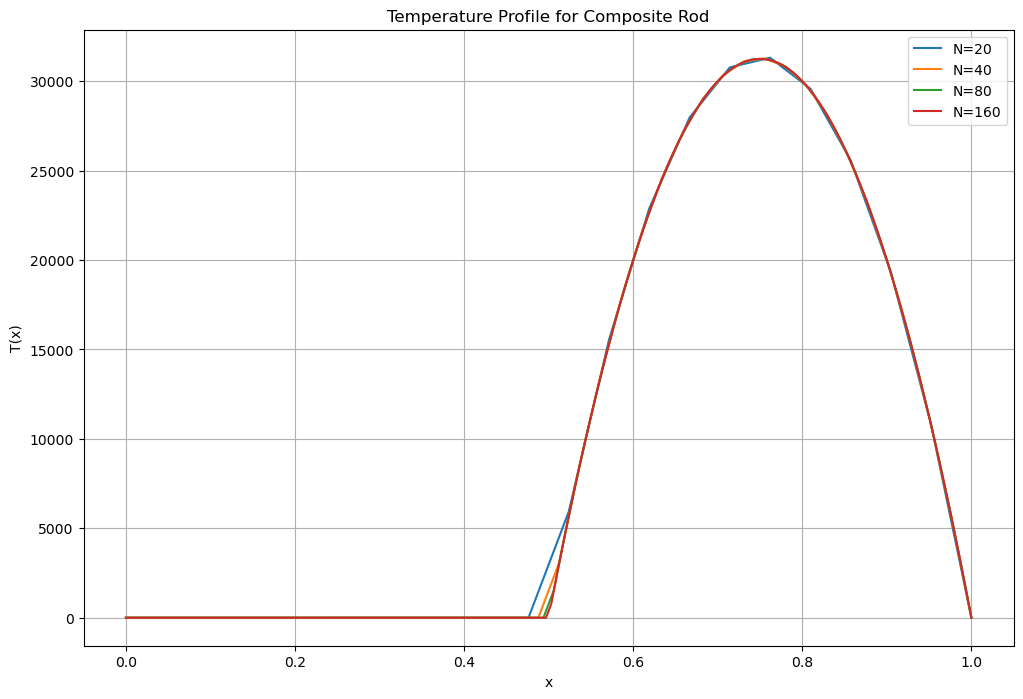

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def build_matrix(N, L, k_func):
    h = L / (N + 1)
    xi = np.linspace(0, L, N + 2)
    ki = np.array([k_func(x) for x in xi])

    # Initialize the coefficient matrix A
    A = np.zeros((N, N))

    # Fill the coefficient matrix A using harmonic interface conductivities
    for i in range(N):
        if i == 0:
            k_left = 0
        else:
            k_left = ki[i]

        k_right = ki[i + 2] if i < N else 0

        k_i_minus_half = 2 * ki[i] * ki[i + 1] / (ki[i] + ki[i + 1])
        k_i_plus_half = 2 * ki[i + 1] * ki[i + 2] / (ki[i + 1] + ki[i + 2])

        if i == 0:
            A[i, i] = -(k_i_minus_half + k_i_plus_half) / h**2
            A[i, i + 1] = k_i_plus_half / h**2
        elif i == N - 1:
            A[i, i - 1] = k_i_minus_half / h**2
            A[i, i] = -(k_i_minus_half + k_i_plus_half) / h**2
        else:
            A[i, i - 1] = k_i_minus_half / h**2
            A[i, i] = -(k_i_minus_half + k_i_plus_half) / h**2
            A[i, i + 1] = k_i_plus_half / h**2

    return A

def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack((A.astype(float), b.reshape(-1, 1).astype(float)))

    for i in range(n):
        max_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        pivot = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / pivot

        for k in range(n):
            if k != i and augmented_matrix[k, i] != 0:
                augmented_matrix[k] = augmented_matrix[k] - augmented_matrix[k, i] * augmented_matrix[i]

    solution = augmented_matrix[:, -1]
    return solution

# Parameters
L = 1.0  # Length of the rod
q0 = 1.0  # Constant heat source
kref = 1.0  # Reference thermal conductivity

# Define the thermal conductivity function k(x)
def k_func(x):
    if x < L / 2:
        return 1.0
    else:
        return 1e-6

# Solve for different N values
N_values = [20, 40, 80, 160]
condition_numbers = []
solutions = []

for N in N_values:
    A = build_matrix(N, L, k_func)
    h = L / (N + 1)
    xi = np.linspace(h, L - h, N)

    # Construct the right-hand side vector b
    b = -q0 / kref * np.ones(N)

    # Solve the system using the Gauss-Jordan elimination method
    T_num = gauss_jordan(A, b)
    solutions.append((np.concatenate(([0], T_num, [0])), xi))

    # Compute the condition number of A
    cond_A = np.linalg.cond(A, p=2)
    condition_numbers.append(cond_A)

    print(f"N = {N}: Condition Number = {cond_A}")

# Plot the numerical solutions
plt.figure(figsize=(12, 8))

for i, N in enumerate(N_values):
    T_num, xi = solutions[i]
    plt.plot(np.concatenate(([0], xi, [L])), T_num, label=f"N={N}")

plt.title("Temperature Profile for Composite Rod")
plt.xlabel("x")
plt.ylabel("T(x)")
plt.legend()
plt.grid(True)
plt.show()
